In [77]:
import numpy as np
import pandas as pd
import os

database = pd.read_csv("Data/Perovskite_database_content_all_data.csv", low_memory=False)

In [78]:
# for column in database.columns:
#     print(column)
    #Perovskite_composition_a_ions, 
    #Perovskite_composition_a_ions_coefficients (need to include b and c columns as well)
    #Perovskite_band_gap 

    #JV_default_Voc/Jsc/FF
database_split = database['Perovskite_composition_a_ions'].str.split(';', expand=True)
dataratio_split = database['Perovskite_composition_a_ions_coefficients'].str.split(';', expand=True)

In [79]:
#I came up with two method for matching: to top each other and form a 3D array 
# database_split = database_split.astype(str)
# stacked_array = np.stack([database_split, dataratio_split], axis=2)
#The logic is that every column should in theory have only one value after the mask
#so I can collaspe all the other "empty" column to form a (1,43378,2) table
#and then flip it and append it to a new table


# masks = {}

# def make_mask(symbol):
#     mask_df = pd.DataFrame({"0" : database_split[0].str.find(symbol), 
#                        "1" : database_split[1].str.find(symbol), 
#                        "2" : database_split[2].str.find(symbol),
#                        "3" : database_split[3].str.find(symbol),
#                        "4" : database_split[4].str.find(symbol)})
#     masks[f'mask_{symbol}'] = mask_df

# make_mask('Cs') 
# make_mask(' Cs')
# make_mask('MA')
# make_mask(' MA')
# make_mask('FA')
# make_mask(' FA')
# print(masks["mask_Cs"])
# database_split[masks["mask_Cs"].to_numpy() == 0]
# mask_Cs, mask_MA, mask_FA, is to organise "stacked_array"

database_split.where(database_split == "Cs", "None")

# When making a mask
# This is a mask
table = pd.DataFrame()
def a_column_collapse(name):
    b = " " + name
    # mask1 = database_split.where(database_split == name)
    mask = (database_split == name) | (database_split == b)
    # mask2 = database_split.where(database_split == b, False)

    # combined_mask = mask1 or mask2
    # print(mask)
    # combined_mask = combined_mask.where(combined_mask == False, True)
    collapsed_column = dataratio_split[mask].apply(lambda row: row.dropna().iloc[0] if not row.dropna().empty else np.nan, axis=1)
    table[name] = collapsed_column
    return collapsed_column

# mask = database_split.where(database_split == "Cs", False)
# mask = mask.where(mask == False, True)
# collapsed_column = database_split[mask].stack().reset_index(drop=True)
# table["Cs"] = collapsed_column

Cs = "Cs"
FA = "FA"
MA = "MA"
a_column_collapse(Cs)
a_column_collapse(FA)
a_column_collapse(MA)


data_B = database['Perovskite_composition_b_ions'].str.split(';', expand=True)
ratio_B = database['Perovskite_composition_b_ions_coefficients'].str.split(';', expand=True)


def b_column_collapse(name):
    mask = data_B == name
    collapsed_column = ratio_B[mask].apply(lambda row: row.dropna().iloc[0] if not row.dropna().empty else np.nan, axis=1)
    table[name] = collapsed_column
    return collapsed_column

Pb = "Pb"
Sn = "Sn"
b_column_collapse(Pb)
b_column_collapse(Sn)
print(table)

         Cs     FA     MA   Pb   Sn
0         1    NaN    NaN  NaN    1
1         1    NaN    NaN  NaN    1
2         1    NaN    NaN  NaN    1
3         1    NaN    NaN  NaN    1
4         1    NaN    NaN  NaN    1
...     ...    ...    ...  ...  ...
43374  0.05   0.91   0.04    1  NaN
43375  0.05   0.91   0.04    1  NaN
43376  0.05   0.91   0.04    1  NaN
43377  0.18   0.83    NaN    1  NaN
43378  0.18   0.82    NaN    1  NaN

[43379 rows x 5 columns]


In [80]:
#This is to find what is in b site table and what do I need to filter out in the table of b ions 

arr1 = data_B[0].unique().astype(str)
arr2 = data_B[1].unique().astype(str)
arr3 = data_B[2].unique().astype(str)

arrall_B = np.concatenate((arr1, arr2, arr3))
mask_B = np.char.find(arrall_B, '|') == -1
noline_B = np.unique(np.char.lstrip(arrall_B[mask_B]))
noline_B

# need to filter "Pb" "Sn"

array(['Ag', 'Al', 'Au', 'Ba', 'Bi', 'Ca', 'Co', 'Cr', 'Cu', 'Eu', 'Fe',
       'Ge', 'Hg', 'In', 'La', 'Mg', 'Mn', 'Nb', 'Ni', 'None', 'Pb', 'Pt',
       'Sb', 'Sm', 'Sn', 'Sr', 'Tb', 'Te', 'Ti', 'Y', 'Zn', 'nan'],
      dtype='<U22')

In [81]:
data_C = database['Perovskite_composition_c_ions'].str.split(';', expand=True)
ratio_C = database['Perovskite_composition_c_ions_coefficients'].str.split(';', expand=True)

def c_column_collapse(name):
    mask_C = data_C == name
    collapsed_column = ratio_C[mask_C].apply(lambda row: row.dropna().iloc[0] if not row.dropna().empty else np.nan, axis=1)
    table[name] = collapsed_column
    return collapsed_column

Cl = "Cl"
Br = "Br"
I = "I"
c_column_collapse(Br)
c_column_collapse(Cl)
c_column_collapse(I)
#checked the unique value in Cs, MA, FA, only Cs has value in the column
#and that is only one entry out of 47739!

0          3
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
43374    NaN
43375    NaN
43376    NaN
43377    NaN
43378    NaN
Length: 43379, dtype: object

In [82]:
table["Perovskite_band_gap"] = database["Perovskite_band_gap"] 


In [83]:
table

,Cs,FA,MA,Pb,Sn,Br,Cl,I,Perovskite_band_gap
0,1,NaN,NaN,NaN,1,NaN,NaN,3,1.27
1,1,NaN,NaN,NaN,1,0.3,NaN,NaN,NaN
2,1,NaN,NaN,NaN,1,1.5,NaN,NaN,NaN
3,1,NaN,NaN,NaN,1,2.7,NaN,NaN,NaN
4,1,NaN,NaN,NaN,1,3,NaN,NaN,1.75
...,...,...,...,...,...,...,...,...,...
43374,0.05,0.91,0.04,1,NaN,0.15,NaN,NaN,NaN
43375,0.05,0.91,0.04,1,NaN,0.15,NaN,NaN,1.54
43376,0.05,0.91,0.04,1,NaN,0.15,NaN,NaN,1.54
43377,0.18,0.83,NaN,1,NaN,1,NaN,NaN,1.73


C:\Users\Mushr\AppData\Local\Temp\ipykernel_15676\2735567685.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  MaskX = x.str.contains(float_regex, regex=True, na=False)   # mask will store the information of the filtered row
C:\Users\Mushr\AppData\Local\Temp\ipykernel_15676\2735567685.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  MaskY = y.str.contains(float_regex, regex=True, na=False)
C:\Users\Mushr\AppData\Local\Temp\ipykernel_15676\2735567685.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  MaskX = x.str.contains(float_regex, regex=True, na=False)   # mask will store the information of the filtered row
C:\Users\Mushr\AppData\Local\Temp\ipykernel_15676\2735567685.py:13: UserWarning: This pattern is interpre

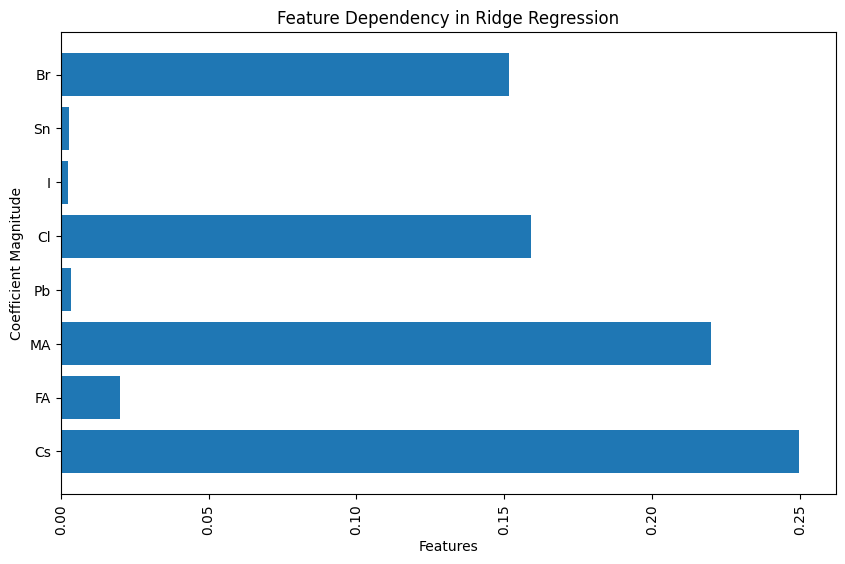

In [152]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

ions = ["Br","Sn","I","Cl","Pb","MA","FA","Cs"]
ions.reverse()
number = []

def plot_bar_RR(name):                                          # Using Ridge Regression and training the model to plot Fig.4 (a)
    x, y = table[name], table["Perovskite_band_gap"]    
    float_regex = r"^[+-]?(\d+(\.\d*)?|\.\d+)$"                 # "only-readable-by-computer-filter" (actually called Regular Expression Filter for float/integer that looks like strings only)
    MaskX = x.str.contains(float_regex, regex=True, na=False)   # mask will store the information of the filtered row
    MaskY = y.str.contains(float_regex, regex=True, na=False)
    SuperMask = MaskX & MaskY                                   # combining boolean masks
    x = pd.to_numeric(x[SuperMask]).to_frame()                  # "to_frame" -> pd.Series to pd.DataFrame because "ridge.fit" need this format
    y = pd.to_numeric(y[SuperMask]).to_frame()

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    ridge = Ridge(alpha=1.0)
    ridge.fit(x_train, y_train)
    coefficients = np.abs(ridge.coef_).flatten()
    return coefficients


for item in ions:
    number.append(plot_bar_RR(item)[0])



plt.figure(figsize=(10, 6))
# plt.bar(feature, coefficients)
plt.barh(ions, number)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Dependency in Ridge Regression')
plt.xticks(rotation=90)
plt.show()


C:\Users\Mushr\AppData\Local\Temp\ipykernel_15676\3461906122.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  MaskX = x.str.contains(float_regex, regex=True, na=False)   # mask will store the information of the filtered row
C:\Users\Mushr\AppData\Local\Temp\ipykernel_15676\3461906122.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  MaskY = y.str.contains(float_regex, regex=True, na=False)
c:\Users\Mushr\miniconda3\envs\researchProject\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Mushr\AppData\Local\Temp\ipykernel_15676\3461906122.py:8: UserWarning: This pattern is interpreted as a regular expression, a

8
8


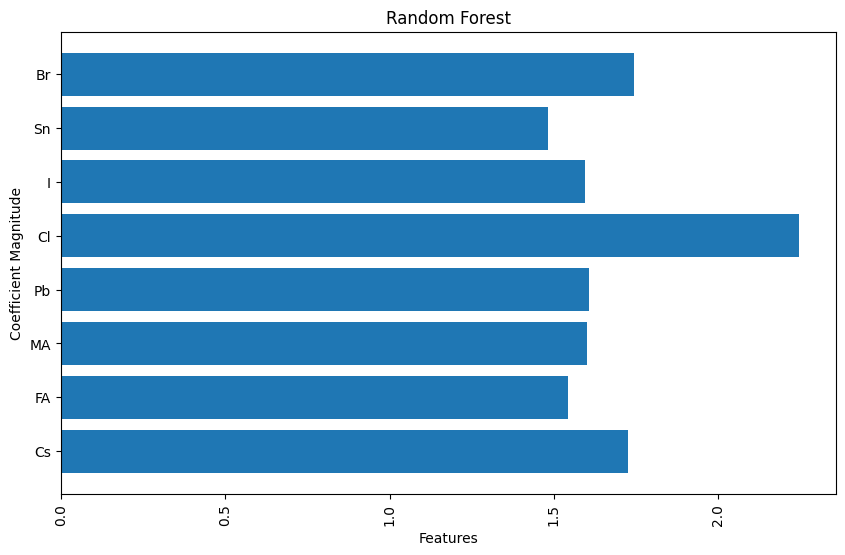

In [159]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


def plot_bar_RF(name):                                          # Using Ridge Regression and training the model to plot Fig.4 (a)
    x, y = table[name], table["Perovskite_band_gap"]    
    float_regex = r"^[+-]?(\d+(\.\d*)?|\.\d+)$"                 # "only-readable-by-computer-filter" (actually called Regular Expression Filter for float/integer that looks like strings only)
    MaskX = x.str.contains(float_regex, regex=True, na=False)   # mask will store the information of the filtered row
    MaskY = y.str.contains(float_regex, regex=True, na=False)
    SuperMask = MaskX & MaskY                                   # combining boolean masks
    x = pd.to_numeric(x[SuperMask]).to_frame()                  # "to_frame" -> pd.Series to pd.DataFrame because "ridge.fit" need this format
    y = pd.to_numeric(y[SuperMask]).to_frame()

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    randomForestRegressor = RandomForestRegressor(n_estimators=100, random_state=42)
    randomForestRegressor.fit(x_train, y_train)
    y_pred = randomForestRegressor.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # print("MSE: ", mse)
    # print("R2 ", r2)
    # print("Average: ", np.average(y_pred))

    return np.average(y_pred)

number = []

for item in ions:
    number.append(plot_bar_RF(item))

print(len(ions))
print(len(number))

plt.figure(figsize=(10, 6))
# plt.bar(feature, coefficients)
plt.barh(ions, number)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Random Forest')
plt.xticks(rotation=90)
plt.show()


In [84]:
data_C = database['Perovskite_composition_c_ions'].str.split(';', expand=True)
ratio_C = database['Perovskite_composition_c_ions_coefficients'].str.split(';', expand=True)

arr1 = data_C[0].unique().astype(str)
arr2 = data_C[1].unique().astype(str)
arr3 = data_C[2].unique().astype(str)
arr4 = data_C[3].unique().astype(str)

arrall_C = np.concatenate((arr1, arr2, arr3, arr4))
mask_C = np.char.find(arrall_C, '|') == -1
noline_C = np.unique(np.char.lstrip(arrall_C[mask_C]))
arrall_C

#need "Br" "Cl" "Cs" "FA" "I" "MA"

array(['I', 'Br', 'I | I', 'Br | Br', 'Br | I', 'O', 'Cl', 'I | Br',
       '(BF4)', '(SCN)', 'I | I | I', 'I | I | Br', '(PF6)', 'S', '0.03',
       'nan', 'F', 'Cs', 'None', ' I', ' I | Br', ' I | I', ' Cl',
       ' (SCN)', ' SCN', ' PF6', ' 0.97', 'nan', ' Br', ' I | Cl',
       ' (PF6)', ' F', ' FA', ' S', 'None', ' I', ' I | Br', ' SCN',
       'nan', ' MA', 'None', ' I', 'nan'], dtype='<U10')